## Metropolitan London Use of Force 

Each row set represents use of force by an officer on one subject. This row set is not a count of incident . Where more than one officer has used force on the same subject, this will be shown on separate rows of data. As such this will result in duplicate metadata. Further consideration needs to be taken when analysing this data to ensure correct conclusions are drawn. For example if 2 officers use force on an individual who happens to be male aged 18-34 this will be shown on 2 rows of data. Hence, if grouping the data, you would have a count of 2x males and 2x 18-34 which would be incorrect. 



### Link to the dataset:
- [Metropolitan Use of Force] https://data.london.gov.uk/dataset/use-of-force

In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline 

### About the dataset
The dataset consist of **147,895 rows** and **271 columns**. We will not be able to train the model with all of this information because not all the features are needed. And in other not to slow down the performance of our system we will limit our samples to **25,000** records from the dataset. We will be doing some cleaning up and preprocessing on the data to suit the model requirements. 

In [13]:
#Load the dataset that was gotten from the metropolitan London data store
police_df=pd.read_csv("mpsuseofforce20-21.csv" , encoding='cp1252')
police_df

C:\Users\danla\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,138,178,218) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,IncidentDate,IncidentTime,Incident Location: Street/Highway,Incident Location: Public Transport,Incident Location: Retail Premises,"Incident Location: Open ground (e.g. park, car park, field)",Incident Location: Licensed Premises,Incident Location: Sports or Event Stadia,Incident Location: Hospital/A&E (non-mental-health setting),Incident Location: Mental Health Setting,...,SubjectInjured,SubjectNatureOfInjury,SubjectMedOffered,SubjectMedProvided,Outcome: Made off/escaped,Outcome: Arrested,Outcome: Hospitalised,Outcome: Detained - Mental Health Act,Outcome: Fatality,Outcome: Other
0,01/04/2020,00:12:00,Yes,No,No,No,No,No,No,No,...,No,NaN,NaN,NaN,No,Yes,No,No,No,No
1,01/04/2020,01:30:00,Yes,No,No,No,No,No,No,No,...,No,NaN,NaN,NaN,No,Yes,No,No,No,Yes
2,01/04/2020,03:30:00,No,No,No,No,No,No,No,No,...,No,NaN,NaN,NaN,No,Yes,No,No,No,No
3,01/04/2020,04:25:00,No,No,No,No,No,No,No,No,...,No,NaN,NaN,NaN,No,No,No,No,No,Yes
4,01/04/2020,04:12:00,No,No,No,No,No,No,No,No,...,No,NaN,NaN,NaN,No,Yes,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147890,31/01/2021,18:00:00,No,No,No,No,No,No,No,No,...,No,NaN,NaN,NaN,No,Yes,No,No,No,No
147891,31/01/2021,15:20:00,Yes,No,No,No,No,No,No,No,...,No,NaN,NaN,NaN,No,Yes,No,No,No,No
147892,31/01/2021,22:00:00,No,No,No,No,No,No,No,No,...,Unknown,NaN,NaN,NaN,No,No,No,Yes,No,No
147893,31/01/2021,19:48:00,Yes,No,No,No,No,No,No,No,...,No,NaN,NaN,NaN,No,Yes,No,No,No,No


In [14]:
#We will use a sample of 25,000 records  
police_df= police_df.sample(25000, replace=True)

### Renaming the model
It is important to know what our label represent and just to give a general understanding abour what each feature depicts as this will be use throughout our experiment. 
 
- Borough - borough
- PrimaryConduct - primaryconduct
- AssaultedBySubject - assaultedbysubject
- Impact Factor: Possesion of a weapon - ifpossessionweapon
- Reason for Force: Protect self - rfprotectself
- Reason for Force: Protect Public - rfprotectpublic
- Reason for Force: Protect Subject - rfprotectsubject
- Reason for Force: Protect Other Officers - rfprotectofficer
- Reason for Force: Prevent Harm - rfpreventharm
- Reason for Force: Prevent Escape - rfpreventescape
- SubjectAge - age
- SubjectGender- gender
- Ethnicity - race
- MentalDisability - mentallydisable
- Outcome: Made off/escaped - escaped
- Outcome: Arrested - arrested

In [15]:
#Lets rename the columns we don't want to use a cumbersome label for our features 
police_df= police_df.rename(columns = {'Incident Location: Street/Highway': 'location', 'Incident Location: Public Transport': 'publictransport',
                                       'Incident Location: Retail Premises':'retailpremises',
                                       'Incident Location: Open ground (e.g. park, car park, field)': 'openground',
                                       'Incident Location: Licensed Premises Incident Location: Sports or Event ' : 'licensedpremises',
                                       'Incident Location: Sports or Event Stadia':'stadium',
                                       'Incident Location: Hospital/A&E (non-mental-health setting)':'nonmentalhealthsetting',
                                       'Incident Location: Mental Health Setting' :'mentalhealthsetting',
                                       'Incident Location: Police vehicle with prisoner handling cage':'policevehicle',
                                       'Incident Location: Police vehicle without prisoner handling cage': 'policevehiclewthprisoner',
                                       'Incident Location: Dwelling':'ildwelling',
                                       'Incident Location: Police station (excluding custody block)': 'ilpolicestation',
                                       'Incident Location: Custody Block':'ilcustodyblock',
                                      'Incident Location: Ambulance' :'ilambulance',
                                      'Incident Location: Other':'ilother',
                                      'Borough':'borough',
                                      'PrimaryConduct':'primaryconduct',
                                      'AssaultedBySubject':'assaultedbysubject',
                                      'Impact Factor: Possesion of a weapon':'ifpossessionweapon',
                                      'Impact Factor: Alcohol':'ifalcohol',
                                      'Impact Factor: Drugs' :'ifdrug',
                                      'Impact Factor: Mental Health':'ifmentalhealth',
                                      'Impact Factor: Prior Knowledge':'ifpriorknowledge',
                                      'Impact Factor: Size/Gender/Build':'ifbysizeandgender',
                                      'Impact Factor: Acute Behavioural Disorder':'ifbehaviorsdisorder',
                                      'Impact Factor: Other':'ifother',
                                      'Reason for Force: Protect self':'rfprotectself',
                                      'Reason for Force: Protect Public':'rfprotectpublic',
                                      'Reason for Force: Protect Subject':'rfprotectsubject',
                                      'Reason for Force: Protect Other Officers':'rfprotectofficer',
                                      'Reason for Force: Prevent Offence':'rfpreventoffence',
                                      'Reason for Force: Secure Evidence' :'rfsecureevidence',
                                      'Reason for Force: Effect Search' :'rfeffectsearch',
                                      'Reason for Force: Effect Arrest' :'rfeffectarrest',
                                      'Reason for Force: Method of Entry':'rfmethodofentry',
                                      'Reason for Force: Remove Handcuffs':'rfremovehandcuffs',
                                      'Reason for Force: Prevent Harm':'rfpreventharm',
                                      'Reason for Force: Prevent Escape':'rfpreventescape',
                                      'Reason for Force: Other':'rfothers',
                                      'MainDuty':'mainduty',
                                      'SingleCrewed':'singlecrewed',
                                      'TrainedCED':'trainedced',
                                      'CarryingCED':'carryingced',
                                      'Tactic 1':'tacticone',
                                      'Effective 1':'effectiveone',
                                      'Tactic 2':'tactictwo',
                                      'Effective 2':'effectivetwo',
                                      'Tactic 3':'tacticthree',
                                      'Effective 3':'effectivethree',
                                      'Firearms Aimed':'fraimed',
                                      'Firearms Fired':'frfired',
                                      'SubjectAge':'age',
                                      'SubjectGender':'gender',
                                      'SuBlackjectEthnicity':'race',
                                      'PhysicalDisability':'physicaldisable',
                                      'MentalDisability':'mentallydisable',
                                      'StaffInjured':'policeinjured',
                                      'SubjectInjured':'subjectinjured',
                                      'Outcome: Made off/escaped':'escaped',
                                      'Outcome: Arrested':'arrested'}, inplace = False)
police_df.head(5)

,IncidentDate,IncidentTime,location,publictransport,retailpremises,openground,Incident Location: Licensed Premises,stadium,nonmentalhealthsetting,mentalhealthsetting,...,subjectinjured,SubjectNatureOfInjury,SubjectMedOffered,SubjectMedProvided,escaped,arrested,Outcome: Hospitalised,Outcome: Detained - Mental Health Act,Outcome: Fatality,Outcome: Other
91839,02/10/2020,13:00:00,No,No,No,No,No,No,No,No,...,No,NaN,NaN,NaN,No,Yes,No,No,No,No
6315,14/04/2020,14:00:00,Yes,No,No,No,No,No,No,No,...,No,NaN,NaN,NaN,No,Yes,No,No,No,No
78842,04/09/2020,19:40:00,Yes,No,No,No,No,No,No,No,...,No,NaN,NaN,NaN,No,Yes,No,No,No,No
61725,29/07/2020,20:00:00,No,No,No,No,No,No,No,No,...,No,NaN,NaN,NaN,No,Yes,No,No,No,No
143974,22/01/2021,20:30:00,Yes,No,No,No,No,No,No,No,...,No,NaN,NaN,NaN,No,No,No,No,No,Yes


In [16]:
#We will drop some features that are not important for our models
police_df=police_df.drop(['IncidentDate','IncidentTime','location','publictransport','stadium','ilambulance','retailpremises','openground','Incident Location: Licensed Premises','Incident Location: Licensed Premises','nonmentalhealthsetting','mentalhealthsetting','policevehicle','policevehiclewthprisoner','ilpolicestation',
                         'ilcustodyblock','ildwelling','policeinjured', 'subjectinjured', 'ifalcohol','ifdrug','fraimed','ilother','ThreatenedWithWeapon','AssaultedWithWeapon','ifmentalhealth','ifpriorknowledge','ifbysizeandgender','ifbehaviorsdisorder','ifother','Impact Factor: Crowd','rfeffectsearch','rfmethodofentry','rfothers','mainduty',
                         'singlecrewed','trainedced','rfpreventoffence','rfsecureevidence','rfeffectarrest','rfprotectsubject','carryingced','tacticone','effectiveone','tactictwo','effectivetwo','tacticthree','effectivethree','Tactic 4','Effective 4','Tactic 5','Effective 5','Tactic 6',
                         'Effective 6','Tactic 7','Effective 7','Tactic 8','Effective 8','Tactic 9','Effective 9','Tactic 10','Effective 10','Effective 11','Tactic 11','Tactic 12','Effective 12','Tactic 13','rfremovehandcuffs',
                         'Effective 13','Tactic 14','Effective 14','Tactic 15','Effective 15','Tactic 16','Effective 16','Tactic 17','Effective 17','Tactic 18','Effective 18','Tactic 19','Effective 19','Tactic 20',
                         'Tactic Effective 20','CED Used','CED Device Serial No','CED Drawn', 'CED Aimed','CED Arced','CED Red-Dotted','CED Drive Stun','CED Drive Stun Repeat Application', 'CED Angle Drive Stun','CED Fired',
                         'CED Fired Cartridge Number','CED Fired 5 Secs Cycle Interrupted','CED Fired Repeat Cycle Same Cartridge','CED Fired Total Number Of Cycles','CED Fired Cycle Extended Beyond 5 Secs',
                         'CED Fired Miss With One Probe','CED Fired Miss With Both Probes','CED Front 1','CED Front 2','CED Front 3','CED Front 4','CED Front 5','CED Front 6','CED Front 7','CED Front 8','CED Front 9',
                         'CED Front 10','CED Front 11','CED Front 12','CED Front 13','CED Front 14','CED Front 15','CED Back A','CED Back B','CED Back C','CED Back D', 'CED Back E','CED Back F','CED Back G','CED Back H','CED Back J',
                         'CED Back K','CED2 Drawn','CED2 Aimed','CED2 ArCED2','CED2 Red-Dotted','CED2 Drive Stun','CED2 Drive Stun Repeat Application','CED2 Angle Drive Stun','CED2 Fired','CED2 Fired Cartridge Number',
                         'CED2 Fired 5 Secs Cycle Interrupted','CED2 Fired Repeat Cycle Same Cartridge','CED2 Fired Total Number Of Cycles','CED2 Fired Cycle Extended Beyond 5 Secs','CED2 Fired Miss With One Probe',
                         'CED2 Fired Miss With Both Probes','CED2 Front 1','CED2 Front 2','CED2 Front 3','CED2 Front 4','CED2 Front 5','CED2 Front 6','CED2 Front 7','CED2 Front 8','CED2 Front 9','CED2 Front 10','CED2 Front 11',
                         'CED2 Front 12','CED2 Front 13','CED2 Front 14','CED2 Front 15','CED2 Back A','CED2 Back B','CED2 Back C','CED2 Back D','CED2 Back E','CED2 Back F','CED2 Back G','CED2 Back H','CED2 Back J','CED2 Back K','CED3 Drawn',
                         'CED3 Aimed','CED3 ArCED3','CED3 Red-Dotted', 'CED3 Drive Stun','CED3 Drive Stun Repeat Application','CED3 Angle Drive Stun','CED3 Fired','CED3 Fired Cartridge Number','CED3 Fired 5 Secs Cycle Interrupted',
                         'CED3 Fired Repeat Cycle Same Cartridge','CED3 Fired Total Number Of Cycles','CED3 Fired Cycle Extended Beyond 5 Secs','CED3 Fired Miss With One Probe','CED3 Fired Miss With Both Probes','CED3 Front 1','CED3 Front 2',
                         'CED3 Front 3','CED3 Front 4','CED3 Front 5','CED3 Front 6','CED3 Front 7','CED3 Front 8','CED3 Front 9','CED3 Front 10','CED3 Front 11','CED3 Front 12','CED3 Front 13','CED3 Front 14','CED3 Front 15','CED3 Back A',
                         'CED3 Back B','CED3 Back C','CED3 Back D','CED3 Back E','CED3 Back F','CED3 Back G','CED3 Back H','CED3 Back J','CED3 Back K','CED4 Drawn','CED4 Aimed','CED4 ArCED4','CED4 Red-Dotted','CED4 Drive Stun',
                         'CED4 Drive Stun Repeat Application','CED4 Angle Drive Stun','CED4 Fired','CED4 Fired Cartridge Number','CED4 Fired 5 Secs Cycle Interrupted','CED4 Fired Repeat Cycle Same Cartridge','CED4 Fired Total Number Of Cycles',
                         'CED4 Fired Cycle Extended Beyond 5 Secs','CED4 Fired Miss With One Probe','CED4 Fired Miss With Both Probes','CED4 Front 1','CED4 Front 2','CED4 Front 3','CED4 Front 4','CED4 Front 5','CED4 Front 6','CED4 Front 7','CED4 Front 8',
                         'CED4 Front 9','CED4 Front 10','CED4 Front 11','CED4 Front 12','CED4 Front 13','CED4 Front 14','CED4 Front 15','CED4 Back A','CED4 Back B','CED4 Back C','CED4 Back D','CED4 Back E','CED4 Back F','CED4 Back G','CED4 Back H',
                         'CED4 Back J','CED4 Back K','frfired','physicaldisable','StaffInjuryIntentional','StaffInjuryLevel','StaffMedProvided','SubjectNatureOfInjury','SubjectMedOffered','SubjectMedProvided',
                         'Outcome: Hospitalised','Outcome: Detained - Mental Health Act','Outcome: Fatality','Outcome: Other'], axis=1)
police_df

,borough,primaryconduct,assaultedbysubject,ifpossessionweapon,rfprotectself,rfprotectpublic,rfprotectofficer,rfpreventharm,rfpreventescape,age,gender,race,mentallydisable,escaped,arrested
91839,Lambeth,agressive,No,No,Yes,No,Yes,Yes,Yes,50-64,Male,Black,No,No,Yes
6315,Croydon,active,No,No,Yes,Yes,Yes,No,Yes,18-34,Male,Black,No,No,Yes
78842,Barnet,Compliant,No,No,Yes,No,No,Yes,Yes,35-49,Male,Black,No,No,Yes
61725,Croydon,agressive,Yes,No,Yes,Yes,Yes,Yes,Yes,18-34,Male,White,Yes,No,Yes
143974,Greenwich,verbal,No,Yes,Yes,Yes,Yes,Yes,Yes,18-34,Male,Black,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64983,Croydon,Compliant,No,Yes,Yes,Yes,Yes,No,No,35-49,Male,Asian,No,No,Yes
60586,Enfield,active,No,No,Yes,Yes,Yes,Yes,Yes,18-34,Male,Other,No,No,Yes
42287,harrow,agressive,No,No,No,No,Yes,Yes,No,50-64,Female,White,No,No,No
39032,Wandsworth,agressive,No,No,Yes,No,Yes,Yes,Yes,18-34,Male,Don't knoWhite,Yes,No,No


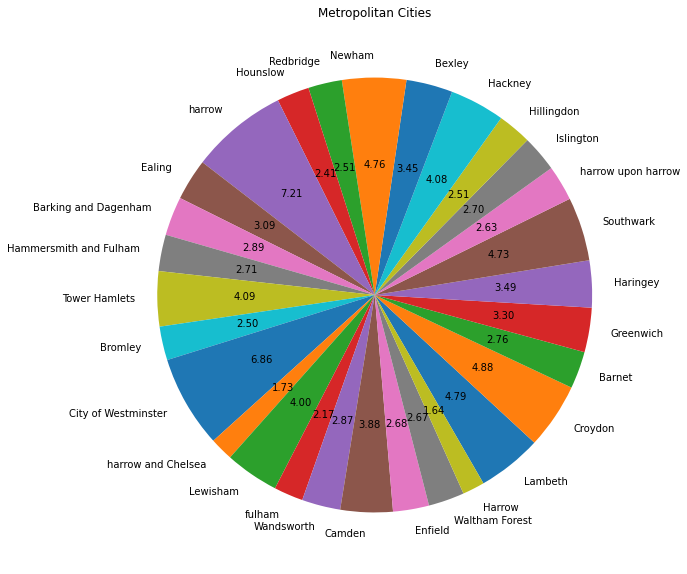

In [17]:
#Let's visualize to see the cities where the crimes are committed.  
plt.figure(figsize=(10,10))
city = [i for i in police_df['borough']]
city_dict = {x:city.count(x) for x in city}
plt.pie(city_dict.values(), labels=city_dict.keys(),autopct='%.2f',startangle=300)
plt.title('Metropolitan Cities');

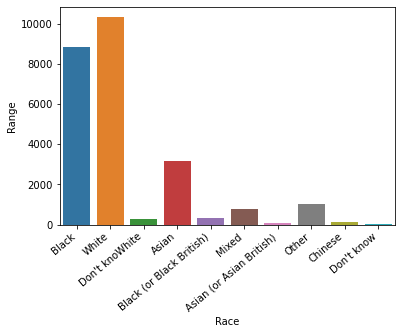

<Figure size 5760x2880 with 0 Axes>

In [18]:
#Lets visualize the race 
ax = sns.countplot(x = police_df['race'])
plt.figure(figsize=(80, 40))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel('Race') 
ax.set_ylabel('Range')
plt.tight_layout()
plt.show()

In [20]:
#Drop all Nan (Note a number)
print("Number of rows before dropping NaNs: %d" % len(police_df))
police_df = police_df.dropna()
print("Number of rows after dropping NaNs: %d" % len(police_df))

Number of rows before dropping NaNs: 25000
Number of rows after dropping NaNs: 25000


In [21]:
#Import library to perform over sampling using Synthetic Minority Over-sampling Techniques
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE

0.7.0


In [23]:
#Import standard scaler preprocessor to store all our numerical value in an array format 
from sklearn.preprocessing import LabelEncoder
police_df[["borough"]] = police_df[["borough"]].apply(LabelEncoder().fit_transform)
police_df[["primaryconduct"]] = police_df[["primaryconduct"]].apply(LabelEncoder().fit_transform)
police_df[["assaultedbysubject"]] = police_df[["assaultedbysubject"]].apply(LabelEncoder().fit_transform)
police_df[["race"]] = police_df[["race"]].apply(LabelEncoder().fit_transform)
police_df[["age"]] = police_df[["age"]].apply(LabelEncoder().fit_transform)
police_df[["gender"]] = police_df[["gender"]].apply(LabelEncoder().fit_transform)
police_df[["mentallydisable"]] = police_df[["mentallydisable"]].apply(LabelEncoder().fit_transform)
police_df[["rfprotectself"]] = police_df[["rfprotectself"]].apply(LabelEncoder().fit_transform)
police_df[["rfprotectpublic"]] = police_df[["rfprotectpublic"]].apply(LabelEncoder().fit_transform)
police_df[["rfprotectofficer"]] = police_df[["rfprotectofficer"]].apply(LabelEncoder().fit_transform)
police_df[["rfpreventharm"]] = police_df[["rfpreventharm"]].apply(LabelEncoder().fit_transform)
police_df[["rfpreventescape"]] = police_df[["rfpreventescape"]].apply(LabelEncoder().fit_transform)
police_df[["escaped"]] = police_df[["escaped"]].apply(LabelEncoder().fit_transform)
police_df[["arrested"]] = police_df[["arrested"]].apply(LabelEncoder().fit_transform)
police_df.head(15)

,borough,primaryconduct,assaultedbysubject,ifpossessionweapon,rfprotectself,rfprotectpublic,rfprotectofficer,rfpreventharm,rfpreventescape,age,gender,race,mentallydisable,escaped,arrested
91839,17,2,0,No,1,0,1,1,1,4,1,2,0,0,1
6315,6,1,0,No,1,1,1,0,1,2,1,2,0,0,1
78842,1,0,0,No,1,0,0,1,1,3,1,2,0,0,1
61725,6,2,1,No,1,1,1,1,1,2,1,9,1,0,1
143974,9,5,0,Yes,1,1,1,1,1,2,1,2,0,0,0
88162,12,5,0,No,1,0,0,1,1,3,1,5,1,0,0
145007,21,0,0,No,1,0,1,0,1,4,1,2,0,0,1
25255,28,0,0,No,1,0,1,0,1,1,1,9,0,0,1
60249,16,5,0,No,1,0,1,1,0,3,1,5,0,0,0
130788,6,1,0,Yes,0,0,1,1,1,2,1,2,0,0,1


In [22]:
#Convert a string variable to a categorical one then fit X,Y sampling
X = police_df.drop('ifpossessionweapon', axis=1)

Y = police_df['ifpossessionweapon']
Y.head()

91839      No
6315       No
78842      No
61725      No
143974    Yes
Name: ifpossessionweapon, dtype: object